


McDonald's is a fast-food behemoth and one of the world's most well-known burger brands. McDonald's generates a brand image by responding to its consumers and modifying its marketing and communication techniques regularly. McDonald's must constantly change since it confronts intense competition from rival fast-food restaurants throughout the world. This article will demonstrate how McDonald's is categorized in the fast-food sector, as well as its target markets and selection process.




In [1]:
#Mount Your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#pip install biopython
#!pip install biopython

In [4]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 942.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.2-py3-none-any.whl size=58828 sha256=a4567def78eeaad91e4909dfb5c359161992143753a92196a6ea1233aa08a3df
  Stored in directory: /root/.cache/pip/wheels/6b/c9/5c/e512a8e241fbcd5b0a5132e8f5d9add9c54fe6d592ae113867
Successfully built bioinfokit


In [5]:
import bioinfokit as bio

In [6]:
#Read a comma-separated values (csv) file into DataFrame.
df = pd.read_csv('/content/drive/MyDrive/ml internship feynn labs/project 2 study task/mcdonalds.csv')

The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes:
YUMMY,CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute).

In [7]:
#list the columns
list(df.columns)

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [8]:
#dimensionality of the DataFrame
df.shape

(1453, 15)

In [9]:
#This function returns the first 3 rows for the object based on position.
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [10]:
#The info() method prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [11]:
MD_x = df.iloc[:, 0:11].copy()

# Convert "Yes" to 1, and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means
col_means = MD_x.mean()

# Round the column means to two decimal places
col_means_rounded = col_means.round(2)

print(col_means_rounded)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [12]:
#returns the number of missing values in the dataset
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data.

In [13]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
#	Fit the model with X and apply the dimensionality reduction on X.
MD_pca = pca.fit_transform(MD_x)

# Convert PCA results to a DataFrame for summary
MD_pca_df = pd.DataFrame(MD_pca, columns=[f"PC{i+1}" for i in range(MD_pca.shape[1])])

# Display summary (explained variance and loadings)
explained_variance_ratio = pca.explained_variance_ratio_
loadings = pca.components_

print("Explained Variance Ratio:")
print(explained_variance_ratio)

print("\nLoadings (Principal Components):")
print(loadings)

print("\nSummary DataFrame:")
print(MD_pca_df.head())

Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Loadings (Principal Components):
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087

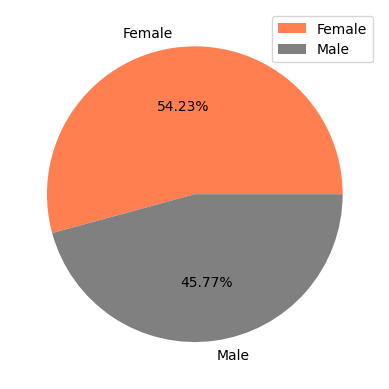

In [14]:
Gender = ["Female", "Male"]
Color = ["coral", "grey"]
Size = df["Gender"].value_counts()
plt.pie(Size, labels=Gender, colors=Color, autopct="%.2f%%")
plt.legend()
plt.show()

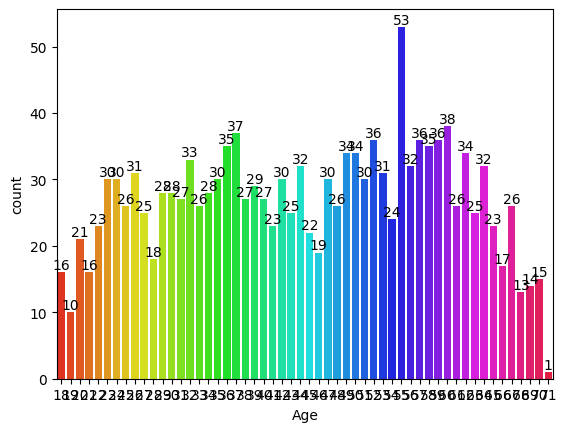

In [15]:
cp = sns.countplot(x=df["Age"], palette='hsv')
cp.bar_label(cp.containers[0])
plt.rcParams['figure.figsize'] = (30, 8)

In [16]:
# columns other than Like, Age, VisitFrequency, Gender are having binary features in the form of Yes/No only.
# so we will perform 'label encoding' for further model building
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [17]:
df_new.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No


In [18]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0
from sklearn.preprocessing import LabelEncoder

df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(df_encoded)

pca = PCA(n_components=11)
pc = pca.fit_transform(df_encoded)
names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]
pf = pd.DataFrame(data=pc, columns=names)
pf



,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [21]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))

print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [22]:
# variance (from PC1 to PC11)
print("Proportion of Variance")

pca.explained_variance_ratio_

Proportion of Variance


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [23]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [24]:
!pip3 install pandas matplotlib seaborn geopandas
!pip3 install scikit-learn scipy bioinfokit
!pip3 install descartes

In [25]:
%matplotlib inline
# General packages
import itertools

import seaborn as sns
import geopandas as gpd
# Packages for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (KMeans,
    AgglomerativeClustering)
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import bioinfokit.visuz

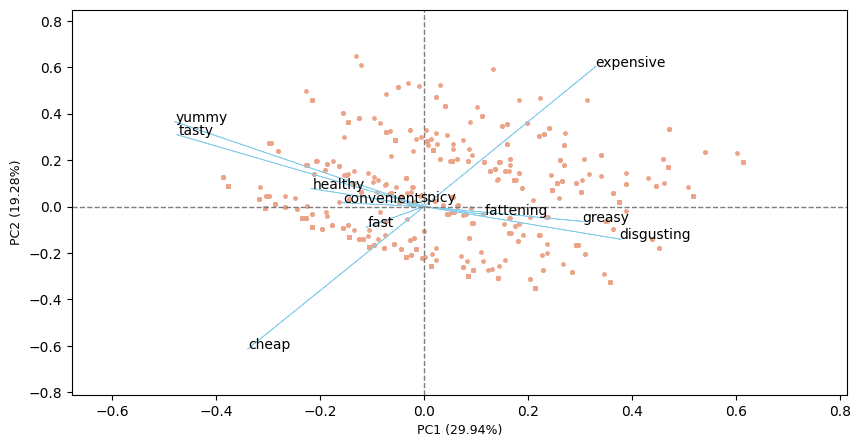

In [26]:
# get PC scores
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
bioinfokit.visuz.cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.
It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

Elbow Method
The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for
. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

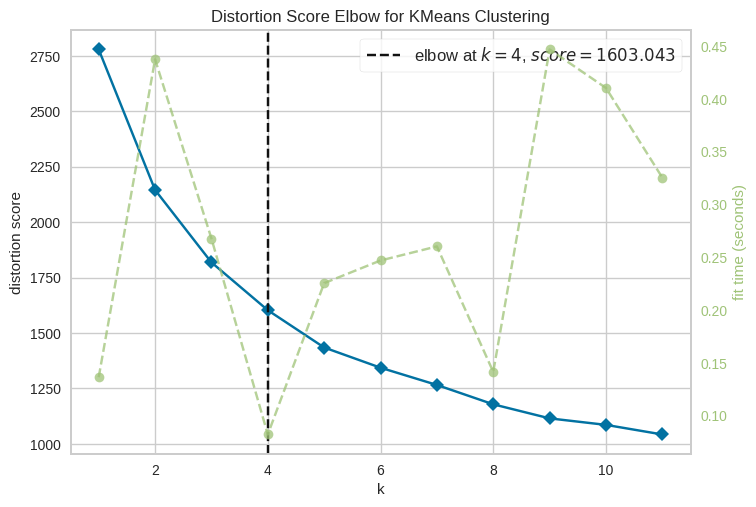

In [27]:
# using k-means clustering analysis for extracting segments
model = KMeans()

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

In [28]:
# k-means clustering
from collections import Counter

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558923
No. of iterations:  7
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


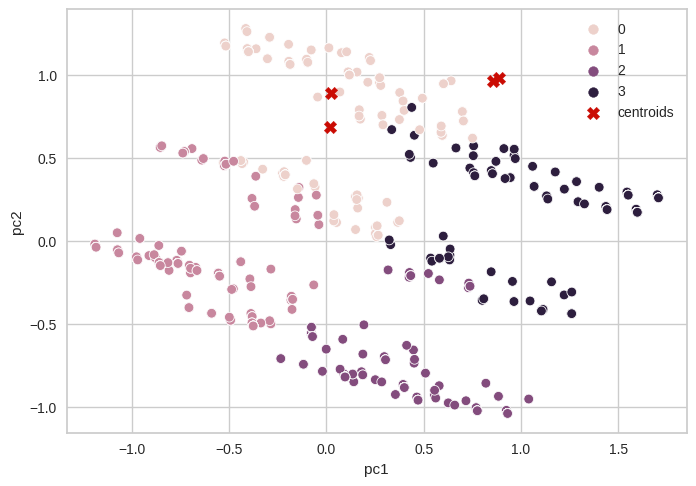

In [29]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [31]:
"""from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 5
plt.show()"""

"from statsmodels.graphics.mosaicplot import mosaic\nfrom itertools import product\ncrosstab =pd.crosstab(df['cluster_num'],df['Like'])\n#Reordering cols\ncrosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]\ncrosstab\n\nmosaic(crosstab.stack())\nplt.rcParams['figure.figsize'] = (7, 5)\nplt.rcParams['font.size'] = 5\nplt.show()"

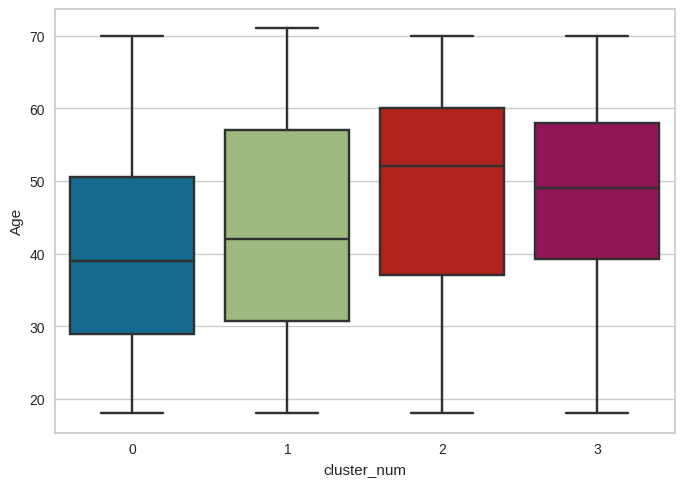

In [32]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

In [33]:
# calculating the mean of 'VisitFrequency'
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [34]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [35]:
# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender



,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [36]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


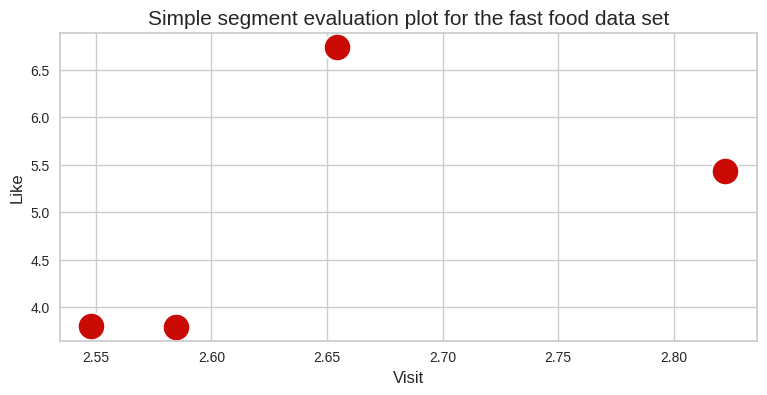

In [37]:
# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()